In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from matplotlib import font_manager, rc
#matplotlib 한글 폰트 오류 문제 해결
font_path='./dataset/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

## 1. 데이터 읽어오기
* 샘플 수 : 150개
* 속성 수 : 4개
    * 속성 1 : sepal length(꽃받침 길이)
    * 속성 2 : sepal width(꽃받침 넓이)
    * 속성 3 : petal length(꽃잎 길이)
    * 속성 4 : petal width(꽃잎 넓이)
* 클래스 : iris-setosa, iris-versicolor, iris-virginica

In [2]:
df = pd.read_csv("./dataset/iris.csv", names = ["꽃받침 길이", "꽃받침 넓이", "꽃잎 길이", "꽃잎 넓이", "품종"])
df.head()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이,품종
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침 길이  150 non-null    float64
 1   꽃받침 넓이  150 non-null    float64
 2   꽃잎 길이   150 non-null    float64
 3   꽃잎 넓이   150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,꽃받침 길이,꽃받침 넓이,꽃잎 길이,꽃잎 넓이
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. 데이터 살펴보기

C:\Users\seohwan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\seohwan\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


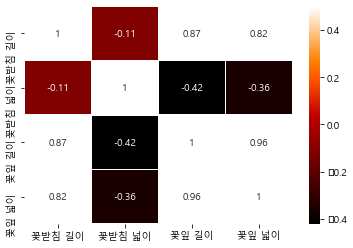

In [5]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, annot=True)
plt.show()

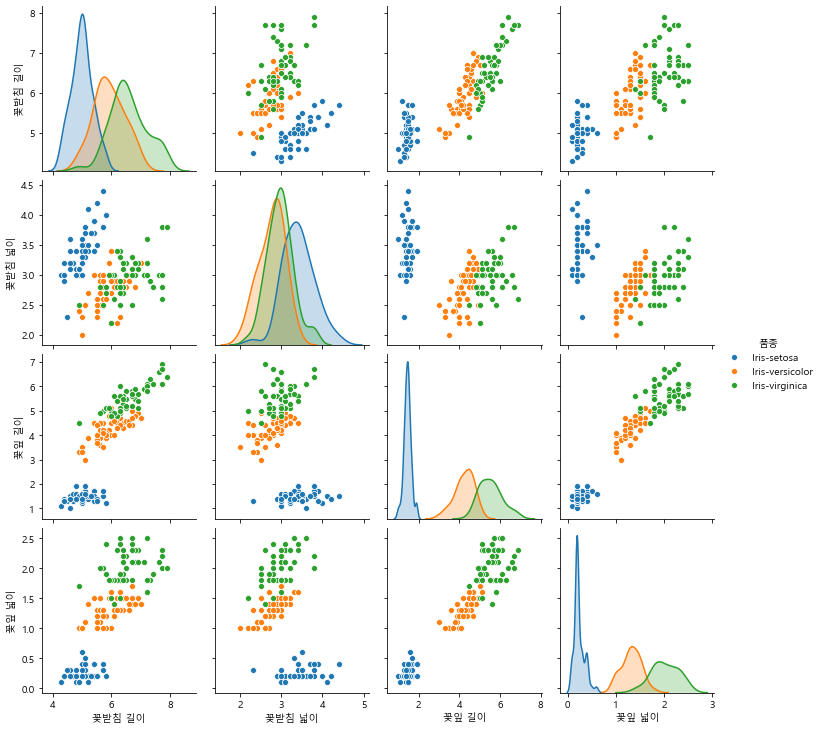

In [6]:
sns.pairplot(df, hue="품종")
plt.show()

## 3. Attribute, Class 나누기 및 Categorical Class를 one-hot encoding 변환

In [7]:
# X에는 attribute, Y에는 class 대입
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:, 4]

# Y에 문자열 데이터로(Castegorical class) one-hot encoding으로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = to_categorical(Y)

## 4. 딥러닝 모델 설정

In [8]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
# 출력층 : class 3개, categorical class로 softmax 사용
model.add(Dense(3, activation='softmax'))

## 5. 모델 컴파일 및 실행

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y_encoded, epochs=300, batch_size=30)

Train on 150 samples
Epoch 1/300
150/150 [==============================] - 0s 2ms/sample - loss: 1.6225 - accuracy: 0.3333
Epoch 2/300
150/150 [==============================] - 0s 53us/sample - loss: 1.5151 - accuracy: 0.3333
Epoch 3/300
150/150 [==============================] - 0s 60us/sample - loss: 1.4206 - accuracy: 0.3333
Epoch 4/300
150/150 [==============================] - 0s 80us/sample - loss: 1.3235 - accuracy: 0.3333
Epoch 5/300
150/150 [==============================] - 0s 60us/sample - loss: 1.2406 - accuracy: 0.3333
Epoch 6/300
150/150 [==============================] - 0s 73us/sample - loss: 1.1644 - accuracy: 0.3333
Epoch 7/300
150/150 [==============================] - 0s 80us/sample - loss: 1.0950 - accuracy: 0.3333
Epoch 8/300
150/150 [==============================] - 0s 66us/sample - loss: 1.0465 - accuracy: 0.3333
Epoch 9/300
150/150 [==============================] - 0s 60us/sample - loss: 1.0129 - accuracy: 0.3333
Epoch 10/300
150/150 [======================

150/150 [==============================] - 0s 60us/sample - loss: 0.5090 - accuracy: 0.8400
Epoch 79/300
150/150 [==============================] - 0s 67us/sample - loss: 0.5060 - accuracy: 0.8333
Epoch 80/300
150/150 [==============================] - 0s 66us/sample - loss: 0.5025 - accuracy: 0.8267
Epoch 81/300
150/150 [==============================] - 0s 73us/sample - loss: 0.5012 - accuracy: 0.8667
Epoch 82/300
150/150 [==============================] - 0s 60us/sample - loss: 0.4964 - accuracy: 0.8867
Epoch 83/300
150/150 [==============================] - 0s 66us/sample - loss: 0.4934 - accuracy: 0.8533
Epoch 84/300
150/150 [==============================] - 0s 73us/sample - loss: 0.4904 - accuracy: 0.8400
Epoch 85/300
150/150 [==============================] - 0s 60us/sample - loss: 0.4877 - accuracy: 0.8600
Epoch 86/300
150/150 [==============================] - 0s 53us/sample - loss: 0.4852 - accuracy: 0.8533
Epoch 87/300
150/150 [==============================] - 0s 73us/samp

150/150 [==============================] - 0s 60us/sample - loss: 0.3473 - accuracy: 0.9600
Epoch 156/300
150/150 [==============================] - 0s 66us/sample - loss: 0.3461 - accuracy: 0.9600
Epoch 157/300
150/150 [==============================] - 0s 67us/sample - loss: 0.3461 - accuracy: 0.9600
Epoch 158/300
150/150 [==============================] - 0s 53us/sample - loss: 0.3432 - accuracy: 0.9533
Epoch 159/300
150/150 [==============================] - 0s 66us/sample - loss: 0.3410 - accuracy: 0.9600
Epoch 160/300
150/150 [==============================] - 0s 53us/sample - loss: 0.3395 - accuracy: 0.9667
Epoch 161/300
150/150 [==============================] - 0s 60us/sample - loss: 0.3383 - accuracy: 0.9667
Epoch 162/300
150/150 [==============================] - 0s 60us/sample - loss: 0.3371 - accuracy: 0.9733
Epoch 163/300
150/150 [==============================] - 0s 60us/sample - loss: 0.3352 - accuracy: 0.9667
Epoch 164/300
150/150 [==============================] - 0s 

150/150 [==============================] - 0s 60us/sample - loss: 0.2448 - accuracy: 0.9733
Epoch 233/300
150/150 [==============================] - 0s 73us/sample - loss: 0.2435 - accuracy: 0.9800
Epoch 234/300
150/150 [==============================] - 0s 66us/sample - loss: 0.2424 - accuracy: 0.9733
Epoch 235/300
150/150 [==============================] - 0s 60us/sample - loss: 0.2412 - accuracy: 0.9733
Epoch 236/300
150/150 [==============================] - 0s 53us/sample - loss: 0.2401 - accuracy: 0.9733
Epoch 237/300
150/150 [==============================] - 0s 60us/sample - loss: 0.2391 - accuracy: 0.9733
Epoch 238/300
150/150 [==============================] - 0s 60us/sample - loss: 0.2381 - accuracy: 0.9733
Epoch 239/300
150/150 [==============================] - 0s 53us/sample - loss: 0.2370 - accuracy: 0.9733
Epoch 240/300
150/150 [==============================] - 0s 73us/sample - loss: 0.2360 - accuracy: 0.9733
Epoch 241/300
150/150 [==============================] - 0s 

In [10]:
print("Accuray : %.4f" % (model.evaluate(X, Y_encoded)[1]))

150/150 [==============================] - 0s 665us/sample - loss: 0.1814 - accuracy: 0.9667
Accuray : 0.9667
